In [2]:
import pandas as pd
import seaborn as sn

In [4]:
df = pd.read_csv("heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [21]:
#(1) Outlier detection and removal using Standard Deviation

In [5]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<AxesSubplot:xlabel='height', ylabel='Count'>

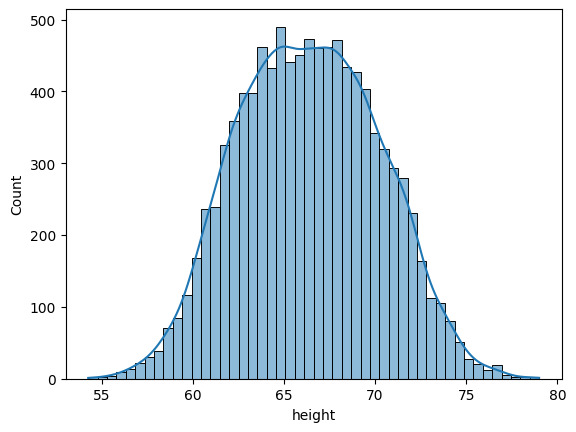

In [6]:
sn.histplot(df.height, kde=True)

In [8]:
mean = df.height.mean()
mean

66.367559754866

In [9]:
std_deviation = df.height.std()
std_deviation

3.847528120795573

In [10]:
mean - 3*std_deviation

54.824975392479274

In [11]:
mean + 3*std_deviation

77.91014411725271

In [13]:
df[(df.height<54.82) | (df.height>77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [18]:
df_no_outlier = df[(df.height>54.82) & (df.height<77.91)]

In [19]:
df_no_outlier.shape

(9993, 2)

(2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score
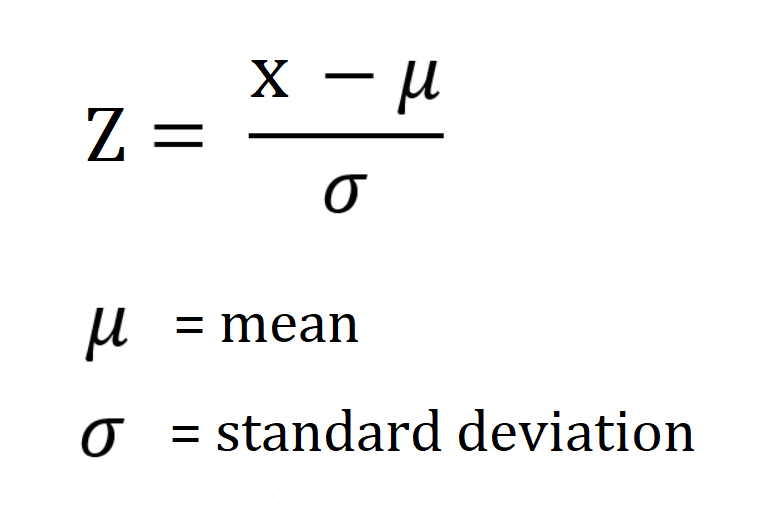



Let's add a new column in our dataframe for this Z score

In [25]:
df['z_score'] = (df.height - df.height.mean()) / df.height.std()
df.head(5)

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [27]:
df[df['z_score']>3]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [29]:
df[df['z_score']<-3]

,gender,height,z_score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027
